# <center>Projet Deep Learning - Exercice de classification</center>

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
import glob
from keras.callbacks import ModelCheckpoint

from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten
from tensorflow.keras.layers import InputLayer
from matplotlib import pyplot as plt
from random import randint
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import torch
use_cuda = torch.cuda.is_available()
use_cuda

False

On va afficher 5 images random présentes dans le fichier.

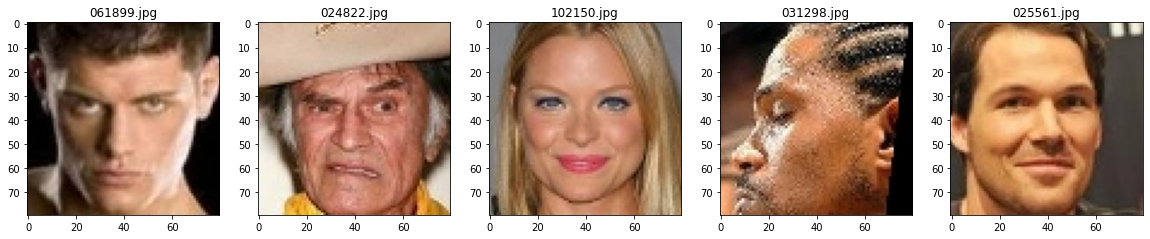

In [3]:
plt.figure(figsize=(20,20))
img_folder = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_train')
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

##### Création des données d'image et des étiquettes à partir des images du dossier

- Le dossier source est le paramètre d'entrée contenant les images des différentes classes.

- Lire le fichier image du dossier et le convertir au bon format de couleur.

- Redimensionnez l'image en fonction de la dimension d'entrée requise pour le modèle.

- Convertir l'image en un tableau Numpy avec float32 comme type de données.

- Normaliser le tableau d'images pour avoir des valeurs réduites entre 0 et 1 de 0 à 255 pour une distribution de données similaire, ce qui permet une convergence plus rapide.

In [4]:
# Vérification du nombre d'image en base d'apprentissage
list_image = os.listdir(img_folder)
len(list_image)

119294

In [5]:
# Vérification du nombre de label de la base d'apprentissage
file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
# utilisez readline() pour lire la première ligne
line = file.readline()
i = 0
while line:
    i = i + 1
    # utilisez readline() pour lire la ligne suivante
    line = file.readline()
file.close()
print(i)

119294


In [6]:
img_size = 80

def create_dataset_train(img_folder, nb):
   
    img_data_array=[]
    class_name=[]
    label_file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
    label_file = label_file.readlines()
    imageList = os.listdir(img_folder)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
        class_name.append(label_file[i].replace("\n",""))
    file.close()
    return img_data_array, class_name
    
img_data, class_name = create_dataset_train(img_folder, 5000)

In [7]:
img = np.array(img_data)
img.shape

(5000, 80, 80, 3)

In [8]:
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'0': 0, '1': 1}

In [9]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

#### Création du réseau convolutif de base

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(80, 80, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activity_regularizer=tf.keras.regularizers.L2(0.01), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 80, 80, 64)        1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 40, 40, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 20, 20, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 10, 10, 128)     

In [37]:
history = model.fit(x=np.array(img_data, np.float32), 
                    y=np.array(list(map(int,target_val)),np.float32), 
                    epochs=100,
                    callbacks=[callback],
                    validation_split = 0.2)


Epoch 1/100
125/125 [==============================] - 43s 343ms/step - loss: 0.5954 - accuracy: 0.7340 - val_loss: 0.5541 - val_accuracy: 0.7520
Epoch 2/100
125/125 [==============================] - 44s 350ms/step - loss: 0.5767 - accuracy: 0.7337 - val_loss: 0.5623 - val_accuracy: 0.7520
Epoch 3/100
125/125 [==============================] - 44s 354ms/step - loss: 0.5624 - accuracy: 0.7345 - val_loss: 0.5109 - val_accuracy: 0.7530
Epoch 4/100
125/125 [==============================] - 44s 356ms/step - loss: 0.5372 - accuracy: 0.7358 - val_loss: 0.5093 - val_accuracy: 0.7530
Epoch 5/100
125/125 [==============================] - 45s 357ms/step - loss: 0.5277 - accuracy: 0.7377 - val_loss: 0.4896 - val_accuracy: 0.7540
Epoch 6/100
125/125 [==============================] - 45s 359ms/step - loss: 0.5194 - accuracy: 0.7362 - val_loss: 0.4988 - val_accuracy: 0.7510
Epoch 7/100
125/125 [==============================] - 46s 365ms/step - loss: 0.5152 - accuracy: 0.7380 - val_loss: 0.5269 -

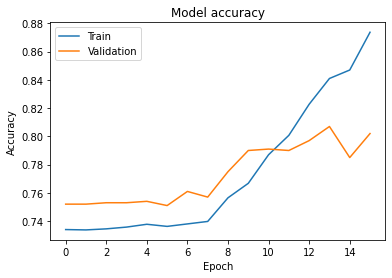

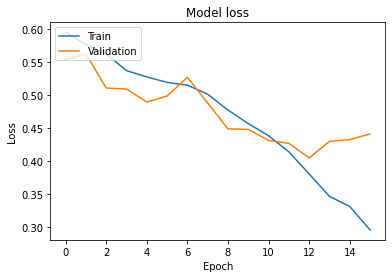

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
img_folder_val = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_val')
def create_dataset_val(img_folder_val):
   
    img_data_array=[]
    imageList = os.listdir(img_folder_val)
    
    for i in range(len(imageList)):
        image = imageList[i]
        image_path= os.path.join(img_folder_val, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
    file.close()
    return img_data_array
test_images = create_dataset_val(img_folder_val)

In [40]:
predictions = model.predict(np.array(test_images))
predictions = np.array(predictions)

In [41]:
classes = np.argmax(predictions, axis = 1)
print(classes[:100])

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1]


In [42]:
fichier = open("predictions_TCHIASSO_LOMBARD.txt", "w")
list_label = classes.tolist()
j = 0
for i in list_label:
    fichier.write(str(i) + "\n")
    j += 1
fichier.close()
j

19878

In [43]:
img_folder = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_val')
i = 0
imageList = os.listdir(img_folder)
for i in range(len(imageList)):
    i = i + 1
print(i)

19878
